# Report the experiment consensus algorithm

### Import modules of consensus algorithm

In [1]:
from consensus.PBFT_Simulator import PBFT_Simulator
from consensus.QPBFT_Simulator import QPBFT_Simulator
from consensus.Proposed_Simulator import Proposed_Simulator
import time
import numpy as np

## Evaluatoin function

Impact of the number of requests

In [2]:
MAX_NUM_REQUESTS = 300
num_requests = np.array([i for i in range(10, MAX_NUM_REQUESTS + 1, 10)])
MAX_NUM_NODES = 50
num_nodes = np.array([i for i in range(10, MAX_NUM_NODES + 1, 5)])
SEED = 100

In [3]:
# All functions in this cell are Transmission Latency (TL) and Probaility of Proving Messages Successfully (PPMS) after sending requests
def evaluation_pbft_request(num_request:int, num_nodes:int, num_rounds:int):
    delays = np.array([])
    probabilities = np.array([])
    consensus = PBFT_Simulator(num_nodes)

    total_delay = 0
    for round in range(1, num_rounds+1):
        start = time.perf_counter()
        for request in range(1, num_request+1):
            consensus.send_request(f"Hello world {round} {request}")
        end = time.perf_counter()
        total_delay += (end - start) * 1000 # ms
        delays = np.append(delays, total_delay)
        probabilities = np.append(probabilities, consensus.success_proof / (round*request*1.0))
    
    return {
        "delays" : delays,
        "probabilities" : probabilities
    }

def evaluation_qpbft_request(num_request:int, num_managing:int, num_voting:int, num_rounds:int):
    delays = np.array([])
    probabilities = np.array([])
    consensus = QPBFT_Simulator(num_managing, num_voting)

    total_delay = 0
    for round in range(1, num_rounds+1):
        start = time.perf_counter()
        for request in range(1, num_request+1):
            consensus.send_request(f"Hello world {round} {request}")
        end = time.perf_counter()
        total_delay += (end - start) * 1000 # ms
        delays = np.append(delays, total_delay)
        probabilities = np.append(probabilities, consensus.success_proof / (round*request*1.0))
    
    return {
        "delays" : delays,
        "probabilities" : probabilities
    }

def evaluation_proposed_scheme_request(num_request:int, num_master:int, num_slave:int,  num_random:int, num_rounds:int):
    delays = np.array([])
    probabilities = np.array([])
    consensus = Proposed_Simulator(num_master, num_slave, num_random)

    total_delay = 0
    for round in range(1, num_rounds+1):
        start = time.perf_counter()
        for request in range(1, num_request+1):
            consensus.send_request(f"Hello world {round} {request}")
        end = time.perf_counter()
        total_delay += (end - start) * 1000 # ms
        delays = np.append(delays, total_delay)
        probabilities = np.append(probabilities, consensus.success_proof / (round*request*1.0))
    
    return {
        "delays" : delays,
        "probabilities" : probabilities
    }

In [4]:
# Throughput
def evaluation_pbft_throughput(num_nodes:np.ndarray, num_rounds:int):
    throughputs = np.array([], dtype="f")
    for num_node in num_nodes:
        consensus = PBFT_Simulator(num_node)

        start = time.perf_counter()
        for round in range(num_rounds):
            consensus.send_request(f"Hello world {round}")
        end = time.perf_counter()

        delay = end-start
        throughput = np.round(num_rounds / delay) # transactions/s
        throughputs = np.append(throughputs, throughput)
    return throughputs

def evaluation_qpbft_throughput(num_nodes:np.ndarray, num_rounds:int, seed:int=0):
    throughputs = np.array([], dtype="f")
    for num_node in num_nodes:

        np.random.seed(seed)
        num_managing = np.random.randint(1, num_node//2)
        num_voting = num_node - num_managing

        consensus = QPBFT_Simulator(num_managing, num_voting)

        start = time.perf_counter()
        for round in range(num_rounds):
            consensus.send_request(f"Hello world {round}")
        end = time.perf_counter()

        delay = end-start
        throughput = np.round(num_rounds / delay) # transactions/s
        throughputs = np.append(throughputs, throughput)
    return throughputs

def evaluation_proposed_throughput(num_nodes:np.ndarray, num_rounds:int, k:int, seed:int=0):
    throughputs = np.array([], dtype="f")
    for num_node in num_nodes:
        
        np.random.seed(seed)
        num_master = np.random.randint(1, num_node//2)
        num_slave = num_node - num_master

        consensus = Proposed_Simulator(num_master, num_slave, k)

        start = time.perf_counter()
        for round in range(num_rounds):
            consensus.send_request(f"Hello world {round}")
        end = time.perf_counter()

        delay = end-start
        throughput = np.round(num_rounds / delay) # transactions/s
        throughputs = np.append(throughputs, throughput)
    return throughputs

## PBFT Algorithm

In [5]:
# delays_request_pbft = np.array([])
# probability_request_pbft = np.array([])

# for i in range(REQUESTS_LENGTH):
#     result = evaluation_pbft_request(num_requests[i], 10)
#     delays_request_pbft = np.append(delays_request_pbft, result[0])
#     probability_request_pbft = np.append(probability_request_pbft, result[1])

result_pbft_request = evaluation_pbft_request(10, 10, 30)
result_pbft_throughput = evaluation_pbft_throughput(num_nodes, 10)

## QPBFT Algorithm

In [6]:
# delays_request_qpbft = np.array([])
# probability_request_qpbft = np.array([])

# for i in range(REQUESTS_LENGTH):
#     result = evaluation_qpbft_request(num_requests[i], 6, 4)
#     delays_request_qpbft = np.append(delays_request_qpbft, result[0])
#     probability_request_qpbft = np.append(probability_request_qpbft, result[1])

result_qpbft_request = evaluation_qpbft_request(10, 6, 4, 30)
result_qpbft_throughput = evaluation_qpbft_throughput(num_nodes, 10, SEED)

## Proposed Scheme 1
> num_random = 4

In [7]:
# delays_request_proposed = np.array([])
# probability_request_proposed = np.array([])

# for i in range(REQUESTS_LENGTH):
#     result = evaluation_proposed_scheme_request(num_requests[i], 6, 4, 4)
#     delays_request_proposed = np.append(delays_request_proposed, result[0])
#     probability_request_proposed = np.append(probability_request_proposed, result[1])

result_proposed_request_1 = evaluation_proposed_scheme_request(10, 6, 4, 4, 30)
result_proposed_throughput_1 = evaluation_proposed_throughput(num_nodes, 10, 4, SEED)

> num_random = 6

In [8]:
# delays_request_proposed2 = np.array([])
# probability_request_proposed2 = np.array([])

# for i in range(REQUESTS_LENGTH):
#     result = evaluation_proposed_scheme_request(num_requests[i], 6, 4, 6)
#     delays_request_proposed2 = np.append(delays_request_proposed2, result[0])
#     probability_request_proposed2 = np.append(probability_request_proposed2, result[1])

result_proposed_request_2 = evaluation_proposed_scheme_request(10, 6, 4, 6, 30)
result_proposed_throughput_2 = evaluation_proposed_throughput(num_nodes, 10, 6, SEED)

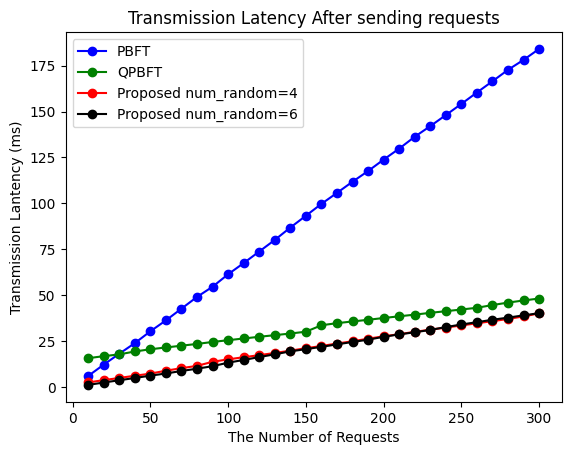

In [9]:
import matplotlib.pyplot as plt

plt.plot(num_requests, result_pbft_request["delays"], label = "PBFT", marker="o", color="blue")
plt.plot(num_requests, result_qpbft_request["delays"], label = "QPBFT", marker="o", color="green")
plt.plot(num_requests, result_proposed_request_1["delays"], label = "Proposed num_random=4", color="red", marker="o")
plt.plot(num_requests, result_proposed_request_2["delays"], label = "Proposed num_random=6", color="black", marker="o")
plt.legend()
plt.xlabel("The Number of Requests")
plt.ylabel("Transmission Lantency (ms)")
plt.title("Transmission Latency After sending requests")
plt.show()

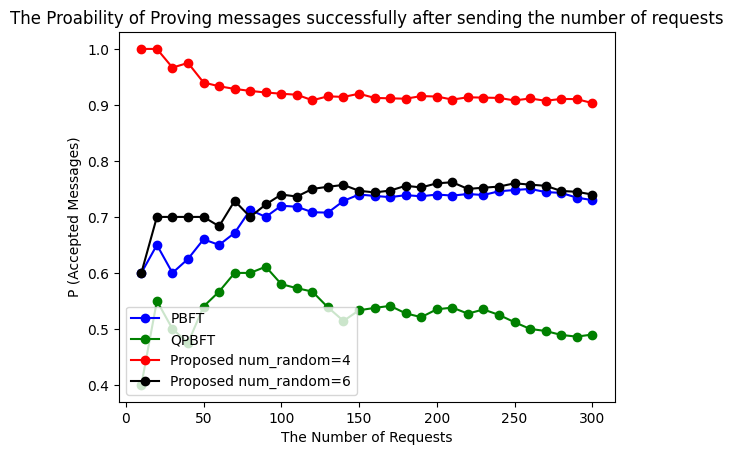

In [10]:
plt.plot(num_requests, result_pbft_request["probabilities"], label = "PBFT", marker="o", color="blue")
plt.plot(num_requests, result_qpbft_request["probabilities"], label = "QPBFT", marker="o", color="green")
plt.plot(num_requests, result_proposed_request_1["probabilities"], label = "Proposed num_random=4", color="red", marker="o")
plt.plot(num_requests, result_proposed_request_2["probabilities"], label = "Proposed num_random=6", color="black", marker="o")
plt.legend()
plt.xlabel("The Number of Requests")
plt.ylabel("P (Accepted Messages)")
plt.title("The Proability of Proving messages successfully after sending the number of requests")
plt.show()

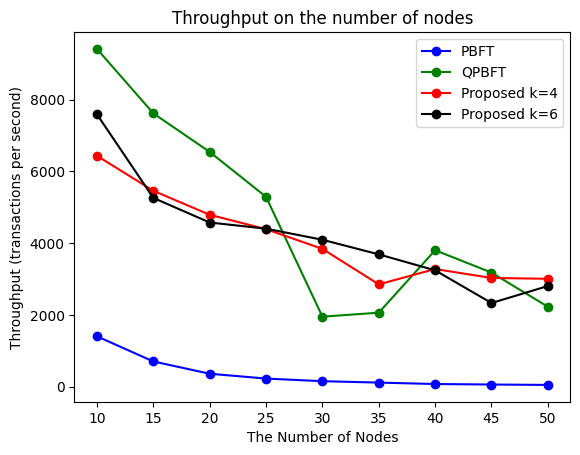

In [11]:
plt.plot(num_nodes, result_pbft_throughput, label="PBFT", marker="o", color="blue")
plt.plot(num_nodes, result_qpbft_throughput, label="QPBFT", marker="o", color="green")
plt.plot(num_nodes, result_proposed_throughput_1, label="Proposed k=4", marker="o", color="red")
plt.plot(num_nodes, result_proposed_throughput_2, label="Proposed k=6", marker="o", color="black")
plt.legend()
plt.xlabel("The Number of Nodes")
plt.ylabel("Throughput (transactions per second)")
plt.title("Throughput on the number of nodes")
plt.show()